In [7]:
from qiskit import *
from math import pi

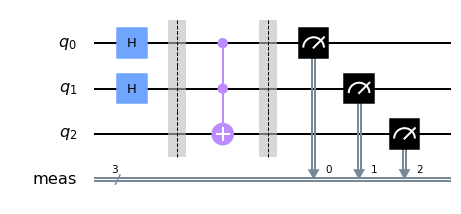

In [29]:
# CCX or AND gate
qc = QuantumCircuit(3)

qc.h(range(2))
qc.barrier()
qc.ccx(0, 1, 2)

qc.measure_all()    # qubits not reversed!
qc.draw('mpl')

In [30]:
backend = Aer.get_backend('qasm_simulator')
execution = execute(qc, backend = backend, shots = 1024)    
results = execution.result()
counts = results.get_counts()
print(counts)

{'000': 256, '001': 249, '010': 271, '111': 248}


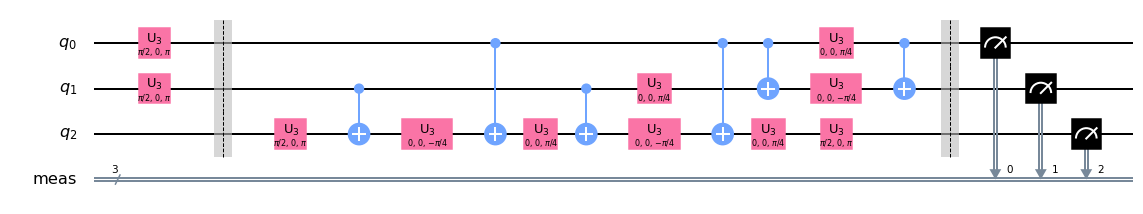

In [31]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 

new_circuit.draw('mpl')

In [5]:
new_circuit.count_ops()

OrderedDict([('u3', 11), ('cx', 6), ('measure', 3), ('barrier', 1)])

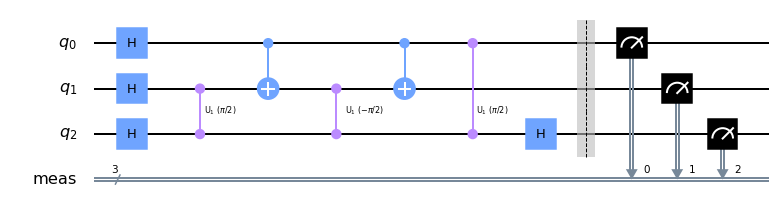

In [73]:
# CCX Alternative
qc = QuantumCircuit(3)

qc.h(range(2))

# HZH
qc.h(2)

# U = V^2 = V^2^(n-2)
# here, n = 3 qubits

# V
qc.cu1(pi/2, 1, 2)
# XOR
qc.cx(0, 1)
# V-dagger
qc.cu1(-pi/2, 1, 2)
# Revert XOR
qc.cx(0, 1)
# V
qc.cu1(pi/2, 0, 2)

qc.h(2)
# HZH ends

qc.measure_all()
qc.draw('mpl')

In [74]:
backend = Aer.get_backend('qasm_simulator')
execution = execute(qc, backend = backend, shots = 1024)    
results = execution.result()
counts = results.get_counts()
print(counts)

{'000': 260, '001': 260, '010': 255, '111': 249}


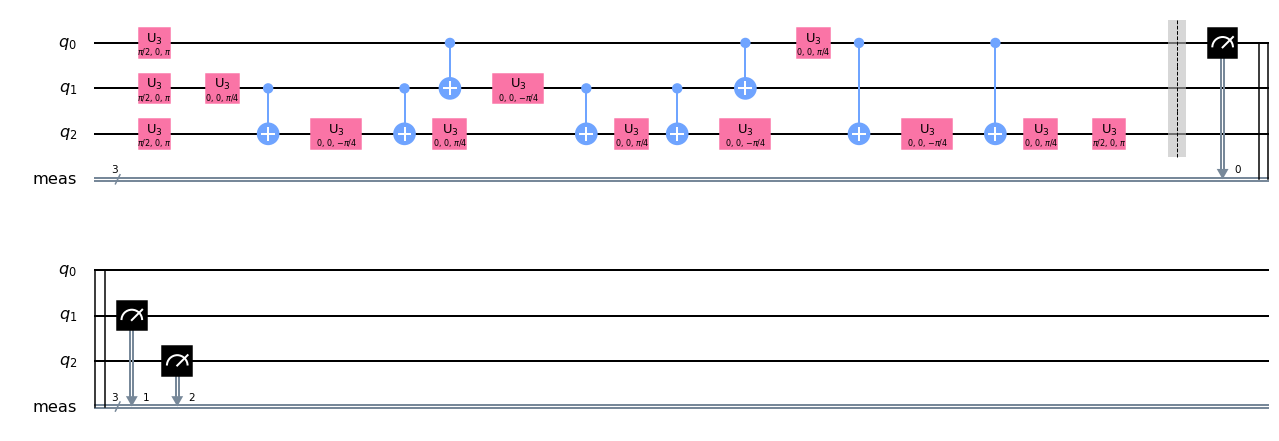

In [75]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 

new_circuit.draw('mpl')

In [76]:
new_circuit.count_ops()

OrderedDict([('u3', 13), ('cx', 8), ('measure', 3), ('barrier', 1)])

In [80]:
# MAKE CHANGES!!!

# # CCX Alternative-2
# qc = QuantumCircuit(3)

# qc.h(range(2))

# # HZH
# qc.h(2)

# # U = V^2 = V^2^(n-2)
# # here, n = 3 qubits

# # V
# qc.cu1(pi/2, 1, 2)
# # V
# qc.cu1(pi/2, 0, 2)
# # XOR
# qc.cx(0, 1)
# # V-dagger
# qc.cu1(-pi/2, 1, 2)
# # Revert XOR
# qc.cx(0, 1)

# qc.h(2)
# # HZH ends

# qc.measure_all()
# qc.draw('mpl')

In [81]:
# backend = Aer.get_backend('qasm_simulator')
# execution = execute(qc, backend = backend, shots = 1024)    
# results = execution.result()
# counts = results.get_counts()
# print(counts)

In [82]:
# from qiskit.transpiler import PassManager
# from qiskit.transpiler.passes import Unroller
# pass_ = Unroller(['cx', 'u3'])
# pm = PassManager(pass_)
# new_circuit = pm.run(qc)

# new_circuit.draw('mpl')

In [83]:
# new_circuit.count_ops()

Refer: Barenco A, Bennett CH, Cleve R, DiVincenzo DP, Margolus N, Shor P, Sleator T, Smolin JA, Weinfurter H. Elementary gates for quantum computation. Physical review A. 1995 Nov 1;52(5):3457.

https://quantumcomputing.stackexchange.com/questions/7082/how-to-reduce-circuit-elements-of-a-decomposed-c2u-operation